In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

titlesize = 20
labelsize = 16
legendsize = labelsize
xticksize = 14
yticksize = xticksize

matplotlib.rcParams['legend.markerscale'] = 1.5 
matplotlib.rcParams['legend.handletextpad'] = 0.5
matplotlib.rcParams['legend.labelspacing'] = 0.4
matplotlib.rcParams['legend.borderpad'] = 0.5
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['axes.labelsize'] = labelsize
matplotlib.rcParams['axes.titlesize'] = titlesize

matplotlib.rc('xtick', labelsize=xticksize)
matplotlib.rc('ytick', labelsize=yticksize)
matplotlib.rc('legend', fontsize=legendsize)

#### Квадратичная функция, её градиент:

$$ f(w) = \langle Aw, w \rangle - \langle b, w \rangle + c, $$

где $A \in R^{m \times m}$ – симметричная матрица, $m$ – количество признаков

$$ \nabla f(w) = Aw - b $$

#### Сведем функцию Q = || Fw - y ||^2 к квадратичной:

$N$ – количество объектов

$$ Q(F, w) = \frac{1}{N}||Fw - y||^2 = \frac{1}{N}\langle Fw - y, Fw - y \rangle = \frac{1}{N} \left( \langle F^T F w, w \rangle - 2 \langle F^T y, w \rangle + \langle y, y \rangle \right)$$

Тогда в обозначениях квадратичной функции:

$$ A = F^T F \in \mathbb{R}^{m \times m} \text{ – симметричная матрица} $$
$$ b = 2 F^T y $$
$$ c = y^T y $$

In [2]:
class QuadraticOracle(object):
    """
    oracle for
    func(x) = (x^TAx - b^Tx + c) / len(A)
    grad func(x) = Aw - b / len(A)
    
    Q = ||Fw - y||^2 / N loss function
    ||Fw - y||^2 = <Fw - y, Fw - y> = <F^T F w, w> - 2 <F^T y, w> + <y,y>
    
    A = F^T F
    b = 2 F^T y
    c = y^T y
    
    """
    def __init__(self, F, y):
        self.n = len(F)
        self.A = F.T.dot(F)
        self.b = 2 * F.T.dot(y)
        self.c = y.dot(y)
        
    def func(self, w):
        res = np.dot(self.A.dot(w), w) - self.b.dot(w) + self.c
        return res / self.n
    
    def grad(self, w):
        res = self.A.dot(w) - self.b
        return res / self.n

In [3]:
def gradient_descent(oracle, w_0, alpha=0.05, max_iter=100, tol=10e-5):
    w_k = np.copy(w_0)
    hist = []
    norm_grad_0 = np.linalg.norm(oracle.grad(w_0))
    
    for i in range(max_iter):
        grad_k = oracle.grad(w_k)
        func_k = oracle.func(w_k)
        hist.append(np.linalg.norm(grad_k))
        d_k = -1 * grad_k
        w_k = w_k + alpha * d_k
        
        if np.linalg.norm(grad_k) <= np.sqrt(tol) * norm_grad_0:
            return hist
    return hist

In [4]:
n = 10000
m = 50

np.random.seed(0)
F = np.random.rand(n, m)
y = np.random.rand(n)
w = np.random.rand(m)

err = np.linalg.norm(F.dot(w) - y)**2 / len(F)
print(err)

134.138010561


In [5]:
quad_oracle = QuadraticOracle(F, y)
quad_oracle.func(w)

134.13801056100692

In [6]:
hist = gradient_descent(quad_oracle, w, alpha=0.005, max_iter=1000)

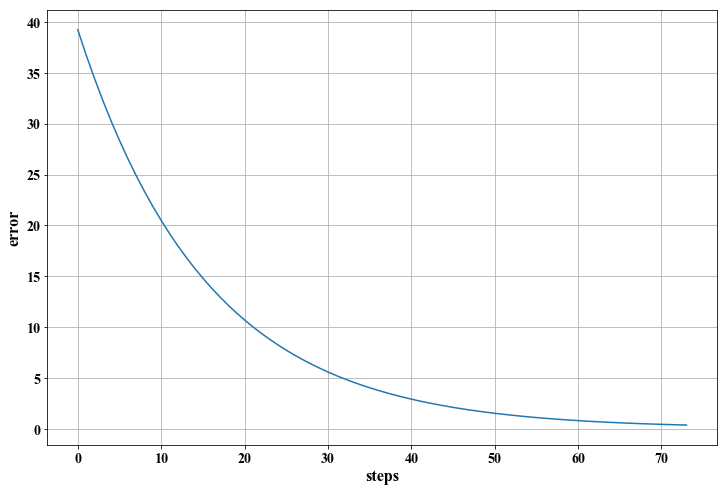

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(hist)
plt.xlabel('steps')
plt.ylabel('error')
plt.grid()

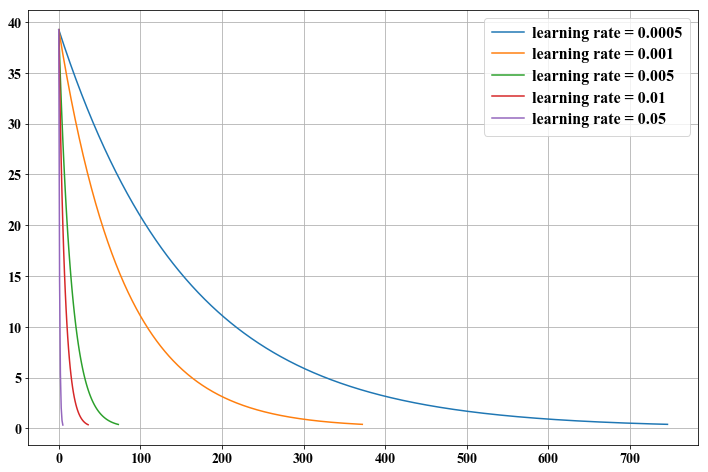

In [8]:
plt.figure(figsize=(12, 8))
for alpha in [0.0005, 0.001, 0.005, 0.01, 0.05]:
    hist = gradient_descent(quad_oracle, w, alpha=alpha, max_iter=1000)
    plt.plot(hist, label='learning rate = {}'.format(alpha))
plt.legend()
plt.grid()

In [9]:
class SgdQuadraticOracle(QuadraticOracle):
    def __init__(self, F, y, batch_size=10):
        super().__init__(F, y)
        self.F = F
        self.y = y
        self.batch_size = batch_size
    
    def grad(self, w):
        random_inds = np.random.randint(low=0, high=self.n, size=self.batch_size)
        random_F = self.F[random_inds]
        random_y = self.y[random_inds]
        
        A = random_F.T.dot(random_F)
        b = 2 * random_F.T.dot(random_y)
        c = random_y.dot(random_y)
        
        res = A.dot(w) - b
        return res / self.batch_size

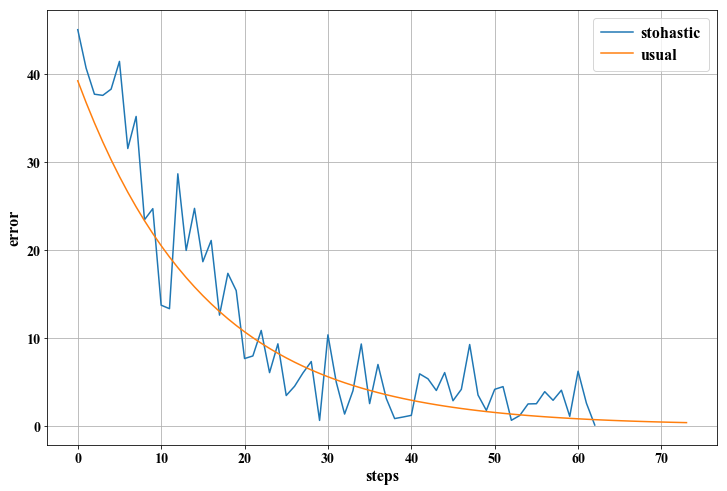

In [10]:
sgd_oracle = SgdQuadraticOracle(F, y, batch_size=1)
hist_sgd = gradient_descent(sgd_oracle, w, alpha=0.005, max_iter=300)
hist = gradient_descent(quad_oracle, w, alpha=0.005, max_iter=300)

plt.figure(figsize=(12, 8))
plt.plot(hist_sgd, label='stohastic')
plt.plot(hist, label='usual')
plt.xlabel('steps')
plt.ylabel('error')
plt.legend()
plt.grid()

In [11]:
len(hist)

74

In [12]:
len(hist_sgd)

63